## Objetivo
Classificar os alunos do ENEM em classes (A - notas boas, B - notas média, C - notas baixas) a partir de uma árvore de decisão cujos principais atributos são as condições socio-econômicas e perfil pessoal do estudante.

### Dataset ENEM 2018
http://download.inep.gov.br/microdados/microdados_enem_2008.zip

In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = df = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin-1', sep = ';', nrows = 2).columns

### Algumas colunas apenas complicarão o modelo, e não fazem sentido serem analisadas, portanto foram removidas da análise, a proposta deste trabalho é obter:

In [3]:
columns_to_drop = [
    'TP_LINGUA',
    'SG_UF_RESIDENCIA',
    'NU_INSCRICAO',
    'NU_ANO',
    'CO_MUNICIPIO_RESIDENCIA',
    'NO_MUNICIPIO_RESIDENCIA',
    'CO_UF_RESIDENCIA',
    'TP_NACIONALIDADE',
    'CO_MUNICIPIO_NASCIMENTO',
    'NO_MUNICIPIO_NASCIMENTO',
    'SG_UF_NASCIMENTO',
    'CO_UF_NASCIMENTO',
    'CO_ESCOLA',
    'CO_MUNICIPIO_ESC',
    'NO_MUNICIPIO_ESC',
    'CO_UF_ESC',
    'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_SIT_FUNC_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_SURDO_CEGUEIRA',
    'IN_DEFICIENCIA_FISICA',
    'IN_VISAO_MONOCULAR',
    'IN_OUTRA_DEF',
    'IN_GESTANTE',
    'IN_LACTANTE',
    'IN_IDOSO',
    'IN_ESTUDA_CLASSE_HOSPITALAR',
    'IN_BRAILLE',
    'IN_AMPLIADA_24',
    'IN_AMPLIADA_18',
    'IN_LEDOR',
    'IN_ACESSO',
    'IN_TRANSCRICAO',
    'IN_LIBRAS',
    'IN_LEITURA_LABIAL',
    'IN_MESA_CADEIRA_RODAS',
    'IN_MESA_CADEIRA_SEPARADA',
    'IN_APOIO_PERNA',
    'IN_GUIA_INTERPRETE',
    'IN_COMPUTADOR',
    'IN_CADEIRA_ESPECIAL',
    'IN_CADEIRA_CANHOTO',
    'IN_CADEIRA_ACOLCHOADA',
    'IN_PROVA_DEITADO',
    'IN_MOBILIARIO_OBESO',
    'IN_LAMINA_OVERLAY',
    'IN_PROTETOR_AURICULAR',
    'IN_MEDIDOR_GLICOSE',
    'IN_MAQUINA_BRAILE',
    'IN_SOROBAN',
    'IN_MARCA_PASSO',
    'IN_SONDA',
    'IN_MEDICAMENTOS',
    'IN_SALA_INDIVIDUAL',
    'IN_SALA_ESPECIAL',
    'IN_SALA_ACOMPANHANTE',
    'IN_MOBILIARIO_ESPECIFICO',
    'IN_MATERIAL_ESPECIFICO',
    'IN_NOME_SOCIAL',
    'CO_MUNICIPIO_PROVA',
    'NO_MUNICIPIO_PROVA',
    'CO_UF_PROVA',
    'SG_UF_PROVA',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TX_GABARITO_CN',
    'TX_GABARITO_CH',
    'TX_GABARITO_LC',
    'TX_GABARITO_MT',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'Q008',
    'Q009',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q026'    
    ]

In [4]:
columns_to_use = []
for column in columns:
    if column in columns_to_drop:
        pass
    else:
        columns_to_use.append(column)

In [5]:
df = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin-1', sep = ';', usecols = columns_to_use, skiprows = 1, names = columns)

In [6]:
df.head()

,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_LOCALIZACAO_ESC,...,Q004,Q005,Q006,Q007,Q010,Q011,Q012,Q024,Q025,Q027
0,44.0,M,1.0,1,2,0,2,1.0,0,1.0,...,A,1,A,A,A,A,A,A,A,A
1,23.0,F,0.0,3,1,5,1,1.0,0,NaN,...,A,4,B,A,A,A,B,A,A,A
2,23.0,F,0.0,1,1,3,1,3.0,0,NaN,...,B,4,C,A,B,A,B,B,B,A
3,26.0,F,0.0,3,1,8,1,1.0,0,NaN,...,B,4,B,A,A,A,B,B,B,A
4,20.0,M,0.0,0,2,0,2,1.0,0,1.0,...,D,3,B,A,A,B,B,B,B,A


### Adiciona ao dataset a nota médio do estudante como a média simples das cincos notas (Ciências da Natureza, Ciências Humanas, Linguagens, Matemática e Redação)

In [7]:
df['NOTA_MEDIA'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO'])/5.0

### Filtra do dataset respostas do tipo 'Não sei' que atrapalharão o modelo

In [8]:
print('Antes {}'.format(df.shape))
df.drop(df[(df['Q001']=="H") | (df['Q002']=="H")|(df['Q003']=="F") | (df['Q004']=="F")].index, inplace=True)
print('Depois {}'.format(df.shape))

Antes (5513747, 35)
Depois (4334366, 35)


### Limpeza de dados. Eliminando colunas sem informação do tipo 'NaN'

In [9]:
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].fillna(1)

In [10]:
df = df.dropna(axis = 0, how = 'any')

In [11]:
df.index = range(df.shape[0])

In [12]:
# confere se o dataset não possui dados faltantes
assert df.notnull().all().all()

In [13]:
import seaborn as sns
sns.distplot(df['NOTA_MEDIA'], bins=150, hist=True, kde=True)

### Transformando o dataset de variáveis categóricas para variáveis numéricas para treinamento do modelo (get_dummies)
Com a ferramenta get_dummies do Pandas transformamos variáveis categórias em booleanas propícias para treinamento de uma árvore binária.

In [14]:
def converte_estado_civil(estado_civil):
    '''
    Converte o estado civil numérico em um texto legível
    '''
    if estado_civil == 0:
        return 'Solteiro'
    elif estado_civil == 1:
        return 'Casado'
    elif estado_civil == 2:
        return 'Divorciado'
    elif estado_civil == 3:
        return 'Viuvo'
    else:
        return estado_civil

In [15]:
def converte_cor_raca(cor_raca):
    '''    
    Converte o estado civil numérico em um texto legível
    '''
    if cor_raca == 0:
        return 'Nao_declarado'
    elif cor_raca == 1:
        return 'Branca'
    elif cor_raca == 2:
        return 'Preta'
    elif cor_raca == 3:
        return 'Parda'
    elif cor_raca == 4:
        return 'Amarela'
    elif cor_raca == 5:
        return 'Indigena'
    else:
        return cor_raca

In [16]:
# análise do dataset
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply(converte_estado_civil)
print(df.TP_ESTADO_CIVIL.value_counts())
print('\n')
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(converte_cor_raca)
print(df.TP_COR_RACA.value_counts())
print('\n')
print(df.IN_DEFICIENCIA_MENTAL.value_counts())
print('\n')
print(df.IN_DEFICIT_ATENCAO.value_counts())
print('\n')
print(df.IN_DISLEXIA.value_counts())
print('\n')
print(df.IN_AUTISMO.value_counts())
print('\n')
print(df.Q024.value_counts())
print('\n')

Solteiro      1681281
Casado         121036
Divorciado      17037
Viuvo            1864
Name: TP_ESTADO_CIVIL, dtype: int64


Parda            896738
Branca           602676
Preta            245005
Amarela           39577
Nao_declarado     25676
Indigena          11546
Name: TP_COR_RACA, dtype: int64


0    1820563
1        655
Name: IN_DEFICIENCIA_MENTAL, dtype: int64


0    1819167
1       2051
Name: IN_DEFICIT_ATENCAO, dtype: int64


0    1820720
1        498
Name: IN_DISLEXIA, dtype: int64


0    1820923
1        295
Name: IN_AUTISMO, dtype: int64


B    841201
A    819710
C    115036
D     31719
E     13552
Name: Q024, dtype: int64




In [17]:
dummies_columns = [
    #'SG_UF_RESIDENCIA',
    'TP_SEXO', 
    'TP_ESTADO_CIVIL', 
    'TP_COR_RACA', 
    'TP_ST_CONCLUSAO', 
    'TP_ANO_CONCLUIU', 
    'TP_ESCOLA',
    'TP_ENSINO',
    'TP_LOCALIZACAO_ESC',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    #'Q008',
    #'Q009',
    'Q010',
    'Q011',
    'Q012',
    #'Q013',
    #'Q014',
    #'Q015',
    #'Q016',
    #'Q017',
    #'Q018',
    #'Q019',
    #'Q020',
    #'Q021',
    #'Q022',
    #'Q023',
    'Q024',
    'Q025',
    #'Q026',
    'Q027'
                ]

In [18]:
df_bkp = df.copy()

In [19]:
df = pd.get_dummies(df, columns = dummies_columns, prefix = dummies_columns, drop_first = True)

In [20]:
print("O dataset agora possui muito mais colunas devido ao get_dummies")
print("df shape: {}".format(df.shape))

O dataset agora possui muito mais colunas devido ao get_dummies
df shape: (1821218, 122)


### Categoriza o desempenho médio dos alunos em A B C
- Aunos classe A: nota média maior que 630
- Alunos classe B: nota média entre 530 e 630
- Alunos classe C: nota média inferior a 530

In [21]:
nota_q1, nota_q2 = df['NOTA_MEDIA'].quantile([.33, .66])
nota_q1 = 530
nota_q2 = 630

In [22]:
def classe_abcd(nota_media, q1, q2):
    if nota_media < q1:
        return '0'
    elif nota_media < q2:
        return '1'
    else:
        return '2'

In [23]:
df['CLASSE_NOTA'] = df.apply(lambda x: classe_abcd(x['NOTA_MEDIA'], nota_q1, nota_q2), axis=1)

In [24]:
df['CLASSE_NOTA'].value_counts()

0    1044887
1     589201
2     187130
Name: CLASSE_NOTA, dtype: int64

In [25]:
print("As notas percentiles 33% e 66% são:", nota_q1, nota_q2)

As notas percentiles 33% e 66% são: 530 630


### Separando dados X e dados Target

In [26]:
columns_to_drop_x = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_MEDIA', 'CLASSE_NOTA']
X = df.drop(columns_to_drop_x, axis=1).values
Y = df['CLASSE_NOTA'].values

In [27]:
X.shape

(1821218, 116)

In [28]:
Y.shape

(1821218,)

In [29]:
X[100]

array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

### Separando dados em treino (80%) e teste (20%)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [31]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1456974, 116)
Y_train shape:  (1456974,)
X_test shape:  (364244, 116)
Y_test shape:  (364244,)


### Treinando o modelo Decision Tree Classification

In [32]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### Randomized Search
Uma árvore de decisão envolve muitos parâmetros. Dentre eles:
- max_depth: qual altura máxima a partir do nó a árvore deve ter?
- min_samples_leaf: o menor valor de amostras necessárias para dividir um nó interno
- critrerion: uma função que mede a qualidade de uma divisão. 'gini' ou 'entropy'
- max_features: número máximo de atributos da amostra utilizados para a melhor divisão
    
Dado o grande volume de dados e hiperparâmetros utilizou-se de uma técnica 'RandomizedSearch' em que se criam ranges de hiperparâmetros e o classificador é treinado de forma aleatória utilizando validação cruzada (nesta caso, k fold de 5 pastas) e partir da combinação de hiperparâmetros definidos

In [33]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.arange(1, 10, 1),
              "max_features": np.arange(3, 12, 1),
              "min_samples_leaf": [50, 100, 500, 1000, 2000, 5000],
              "criterion": ["gini", "entropy"],
              "splitter": ['best', 'random']}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# Fit it to the data
tree_cv.fit(X_train, Y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

Tuned Decision Tree Parameters: {'splitter': 'best', 'min_samples_leaf': 5000, 'max_features': 10, 'max_depth': 9, 'criterion': 'gini'}
Best score is 0.611176314745493


In [61]:
tree = DecisionTreeClassifier(splitter = 'random', criterion = 'entropy', max_features = 8, max_depth = 5, min_samples_leaf = 5000)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6079798157279186


In [52]:
print(Y_test[110:120])
print(y_pred[110:120])

['0' '1' '0' '0' '2' '1' '1' '0' '2' '0']
['0' '0' '0' '0' '0' '0' '1' '0' '2' '0']


In [37]:
print(nota_q1, nota_q2)
# 55% com notas 500 e 610
# 61% com notas 530 e 630

530 630


### Geração do diagrama da Árvore de decisão


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y
Solving environment: done

# All requested packages already installed.



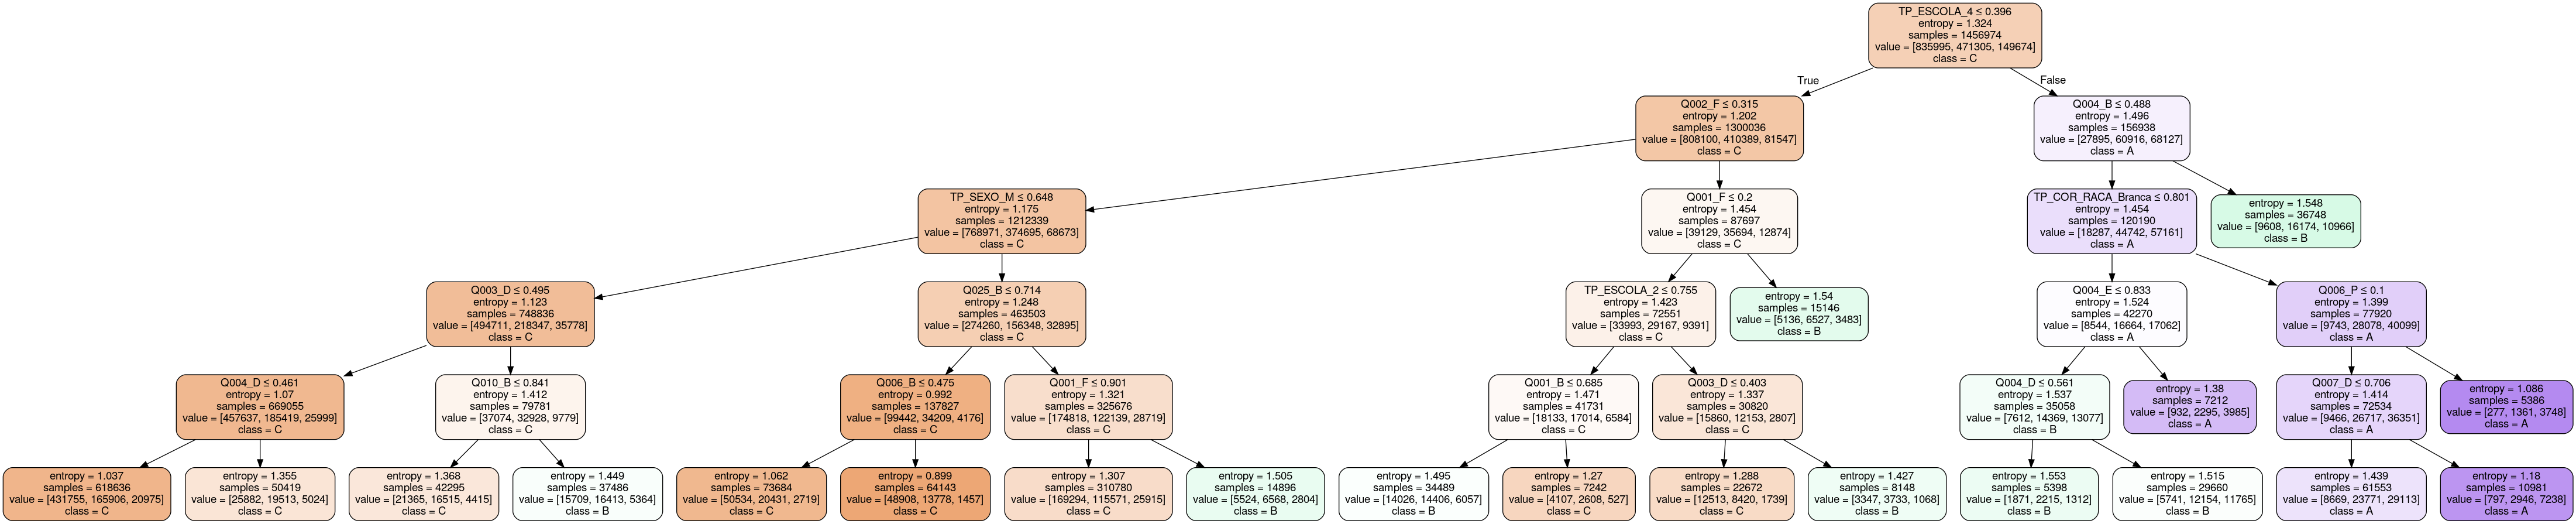

In [62]:
!pip install pydotplus
!pip install graphviz -y
!conda install graphviz -y
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = df.drop(columns_to_drop_x, axis=1).columns
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['C', 'B', 'A'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree-ENEM.png')
Image(graph.create_png())

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
multilabel_confusion_matrix(Y_test, y_pred, labels = np.unique(Y_test))
confusion_matrix(Y_test, y_pred, labels = np.unique(Y_test))

array([[199530,   7279,   2083],
       [ 99153,  12559,   6184],
       [ 18390,   9340,   9726]])

In [40]:
df_bkp['CLASSE_NOTA'].value_counts()

KeyError: 'CLASSE_NOTA'